**ML with SKLearn Assignment**

Rikita Patangay

Due Sunday 11/6


**Reading in the data**

First we have to read in the data and save Auto.csv into pandas dataframe.

In [7]:
import pandas as pd

df = pd.read_csv('Auto.csv')

print(df.head())
print('\nDimensions of data frame:', df.shape)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

Dimensions of data frame: (392, 9)


df = df.drop(columns=['name','mpg'])
print(df.head())


**Data exploration**

In [8]:
print('\nDescribe  mpg, weight, and year:\n', df.loc[:, ['mpg', 'weight', 'year']].describe())

print('\nRange of mpg:\t\t', df['mpg'].max() - df['mpg'].min())
print('Range of weight:\t', df['weight'].max() - df['weight'].min())
print('Range of year:\t\t', df['year'].max() - df['year'].min())

print('\nMean of mpg:\t', df['mpg'].mean())
print('Mean of weight:\t', df['weight'].mean())
print('Mean of year:\t', df['year'].mean())


Describe  mpg, weight, and year:
               mpg       weight        year
count  392.000000   392.000000  390.000000
mean    23.445918  2977.584184   76.010256
std      7.805007   849.402560    3.668093
min      9.000000  1613.000000   70.000000
25%     17.000000  2225.250000   73.000000
50%     22.750000  2803.500000   76.000000
75%     29.000000  3614.750000   79.000000
max     46.600000  5140.000000   82.000000

Range of mpg:		 37.6
Range of weight:	 3527
Range of year:		 12.0

Mean of mpg:	 23.445918367346938
Mean of weight:	 2977.5841836734694
Mean of year:	 76.01025641025642


**What data types do we see?**

In [9]:
df.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

**Categorical data visualization**

In [10]:
df.cylinders = df.cylinders.astype('category').cat.codes
df = df.astype({"origin":'category'})
df.dtypes


mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object

NAs

In [11]:
df.isna().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    1
year            2
origin          0
name            0
dtype: int64

**Dropping the NAs**

There are 3 nas we will drop them from the data (Acceleration(1)Year(2))

In [12]:
df = df.dropna()
print('\nDimensions of data frame:', df.shape)


Dimensions of data frame: (389, 9)


In [28]:
import numpy as np
avg = df.mpg.mean()
df['mpg_high'] = np.where(df.mpg > avg, 1, 0)

**Modify the data into columns**


In [29]:
df = df.drop(columns=['name','mpg'])
print(df.head())

   cylinders  displacement  horsepower  weight  acceleration  year origin  \
0          4         307.0         130    3504          12.0  70.0      1   
1          4         350.0         165    3693          11.5  70.0      1   
2          4         318.0         150    3436          11.0  70.0      1   
3          4         304.0         150    3433          12.0  70.0      1   
6          4         454.0         220    4354           9.0  70.0      1   

   mpg_high  
0         0  
1         0  
2         0  
3         0  
6         0  


**Graph Visualization**

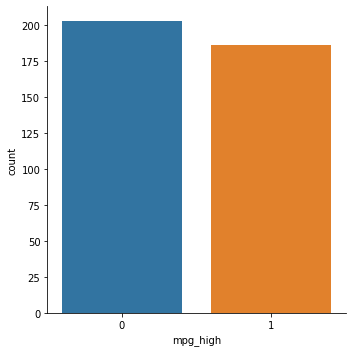

In [27]:
import seaborn as sb

sb.catplot(x = 'mpg_high', kind = 'count', data = df)

**Horsepower vs. weight**

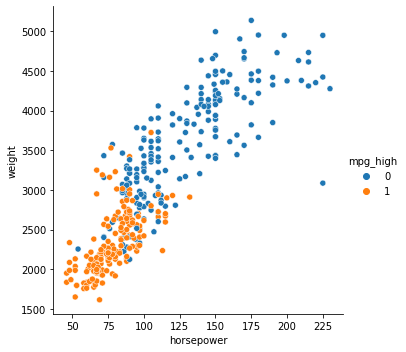

In [15]:
sb.relplot(x = 'horsepower', y = 'weight', data = df, hue = df.mpg_high)


**mpg_high vs. weight**

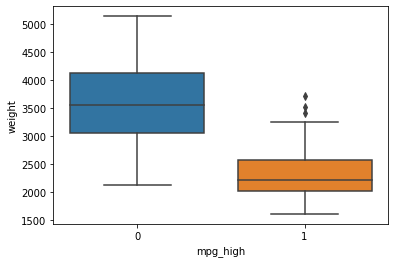

In [16]:
sb.boxplot(x = 'mpg_high', y = 'weight', data = df)


**Splitting train and test**

In [17]:
import sklearn
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:6]
y = df.iloc[:, 7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

print('Train size:', X_train.shape)
print('Test size:', X_test.shape)

train size: (311, 6)
test size: (78, 6)


**Logistic Regression**

We will now perform logisic regression on the train data.

In [32]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(max_iter=10000)
LogisticReg = LogisticRegression(solver = 'lbfgs')
logReg.fit(X_train, y_train)
logReg.score(X_train, y_train)

0.7620578778135049

**Predict**

In [33]:
predLR = logReg.predict(X_test)


**Evaluate**

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracyLR = accuracy_score(y_test, predLR)
precisionLR = precision_score(y_test, predLR, average='micro')
recallLR = recall_score(y_test, predLR, average='micro')
f1LR = f1_score(y_test, predLR, average='micro')

print('Accuracy score: ', accuracyLR)
print('Precision score: ', precisionLR)
print('Recall score: ', recallLR)
print('f1 score: ', f1LR)

accuracy score:  0.7692307692307693
precision score:  0.7692307692307693
recall score:  0.7692307692307693
f1 score:  0.7692307692307693


**Decision Tree**

Train a decision tree.

In [38]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier()
dTree.fit(X_train, y_train)

DecisionTreeClassifier()

**Make predictions**

In [39]:
predDT = dTree.predict(X_test)


**Evaluate**

In [43]:
accuracyDT = accuracy_score(y_test, predDT)
precisionDT = precision_score(y_test, predDT, average='micro')
recallDT = recall_score(y_test, predDT, average='micro')
f1DT = f1_score(y_test, predDT, average='micro')

print('Accuracy score: ', accuracyDT)
print('Precision score: ', precisionDT)
print('Recall score: ', recallDT)
print('f1 score: ', f1DT)

accuracy score:  0.8333333333333334
precision score:  0.8333333333333334
recall score:  0.8333333333333334
f1 score:  0.8333333333333334


**Neural Network**

Make the data normal.

In [45]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Using Hidden layer**

Train the data with hidden Layer size (5,2).

In [46]:
from sklearn.neural_network import MLPClassifier

nn1 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 2), max_iter=500, random_state=1234)
nn1.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=500, random_state=1234,
              solver='lbfgs')

**Predict**

In [47]:
predNN1 = nn1.predict(X_test_scaled)


**Output the result (Confusion Matrix)**

In [49]:
from sklearn.metrics import confusion_matrix

accuracyNN1 = accuracy_score(y_test, predNN1)
precisionNN1 = precision_score(y_test, predNN1,average='micro')
recallNN1 = recall_score(y_test, predNN1,average='micro')
f1NN1 = f1_score(y_test, predNN1,average='micro')

print('Accuracy score: ', accuracyNN1)
print('Precision score: ', precisionNN1)
print('Recall score: ', recallNN1)
print('f1 score: ', f1NN1)

confusion_matrix(y_test, predNN1)

accuracy score:  0.8333333333333334
precision score:  0.8333333333333334
recall score:  0.8333333333333334
f1 score:  0.8333333333333334


array([[47,  2,  2],
       [ 0,  6,  2],
       [ 3,  4, 12]])

**Using hidden layer**

Using hidden layer size (4.2), train neural network.

In [54]:

nn2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(4, 2), max_iter=1000, random_state=1234)
nn2.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(4, 2), max_iter=1000, random_state=1234,
              solver='lbfgs')

# **Predict**

In [55]:
predNN2 = nn2.predict(X_test_scaled)


# **Output the result**

In [57]:
accuracyNN2 = accuracy_score(y_test, predNN2)
precisionNN2 = precision_score(y_test, predNN2,average='micro')
recallNN2 = recall_score(y_test, predNN2,average='micro')
f1NN2 = f1_score(y_test, predNN2,average='micro')

print('accuracy score: ', accuracyNN2)
print('precision score: ', precisionNN2)
print('recall score: ', recallNN2)
print('f1 score: ', f1NN2)

confusion_matrix(y_test, predNN2)

accuracy score:  0.8589743589743589
precision score:  0.8589743589743589
recall score:  0.8589743589743589
f1 score:  0.8589743589743589


array([[49,  0,  2],
       [ 2,  5,  1],
       [ 6,  0, 13]])

# **Analysis**

From what I can see from this data, **Decision Tree** was put to a better use for this data. Decision Tree outperformed Logistic Regression and Neural Network in accuracy and precision. The algorithms had tied when it came to recall. Since neural networks are usually used for more complex sets of data the algorithm was not suitable foe these smaller set of data. 

I definitely much prefer **SKLearn** to R. I feel that SKLearn in a simpler way, and simpler syntax. I think this is because I have had more experience programming in Python. I really liked using Google Colab for this assignment. I am very familiar with Google apps and I think their interface is pretty straightforward and easy to learn. Before this class I had never heard of it, and I am glad that I have the knowlwdge on how to use it now.

